In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("57515.jpg")

In [3]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSV_mask = cv2.inRange(img_HSV, (0, 58, 0), (50,173,255)) 


In [4]:
HSV_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

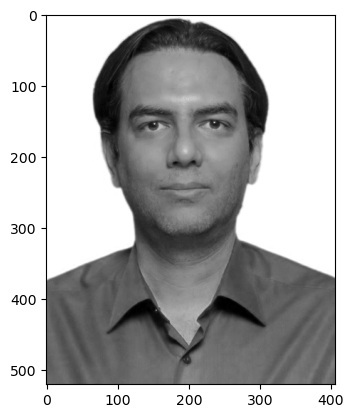

In [5]:
B = img[...,0]
G = img[...,1]
R = img[...,2]
plt.imshow(B,cmap = 'gray')

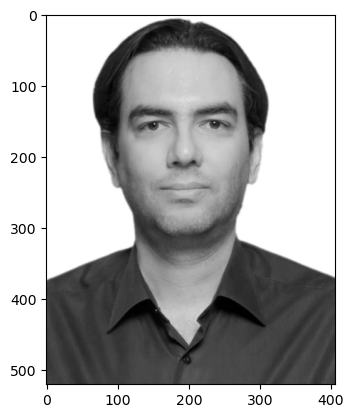

In [6]:
plt.imshow(R,cmap = 'gray')

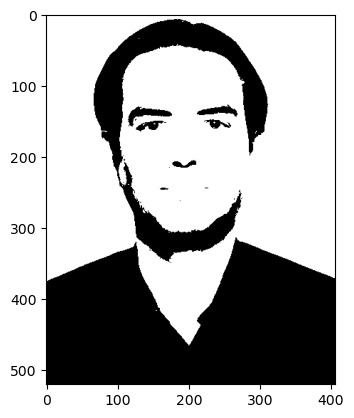

In [7]:
mask1 = R > 95

plt.imshow(mask1, cmap='gray')


In [8]:
mask1 = np.where(mask1==True,1,0)

In [9]:
mask1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

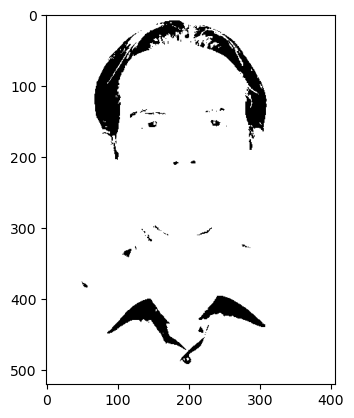

In [10]:
mask2 = G > 40
plt.imshow(mask2, cmap='gray')


In [11]:
mask2 = np.where(mask2==True,1,0)

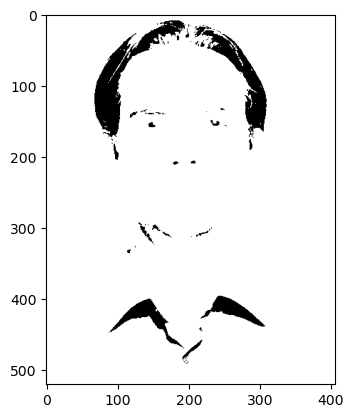

In [12]:
mask3 = B > 40
plt.imshow(mask3, cmap='gray')

In [13]:
mask3 = np.where(mask3==True,1,0)

In [14]:
res1 = cv2.bitwise_and(mask1, mask2)

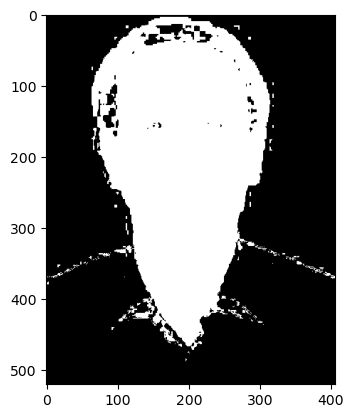

In [15]:
mask4 = R > G
plt.imshow(mask4, cmap='gray')

In [16]:
mask4 = np.where(mask4==True,1,0)

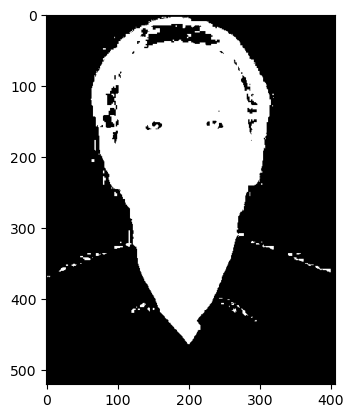

In [17]:
mask5 = R > B
plt.imshow(mask5, cmap='gray')

In [18]:
mask5 = np.where(mask5==True,1,0)

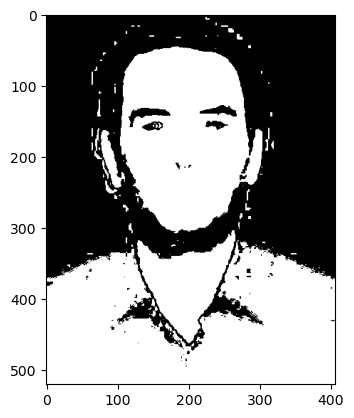

In [19]:
mask6 = np.abs(R-G) > 15
plt.imshow(mask6, cmap='gray')

In [20]:
mask6 = np.where(mask6==True,1,0)

In [21]:
res1 = cv2.bitwise_and(mask1, mask2, mask3)

In [22]:
res2 = cv2.bitwise_and(mask4, mask5, mask6)

In [23]:
res = cv2.bitwise_and(res1, res2)

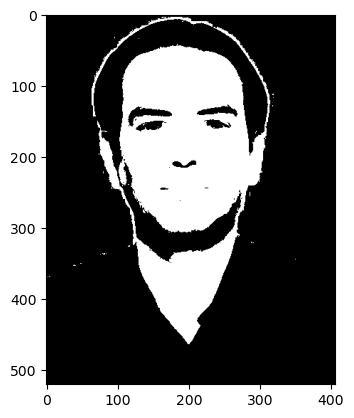

In [24]:
plt.imshow(res, cmap='gray')

In [25]:
res_int8 = res.astype(np.uint8)

In [26]:
new = cv2.bitwise_and(img, img, mask = res_int8)

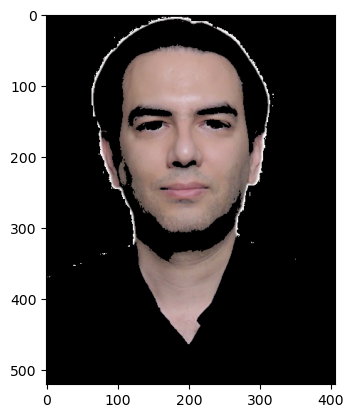

In [27]:
plt.imshow(new[...,::-1])

In [28]:
lower = np.array([0,58,50])
upper = np.array([50,173,255])

In [29]:
hsv_image = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [30]:
mask7 = cv2.inRange(hsv_image, lower, upper) 

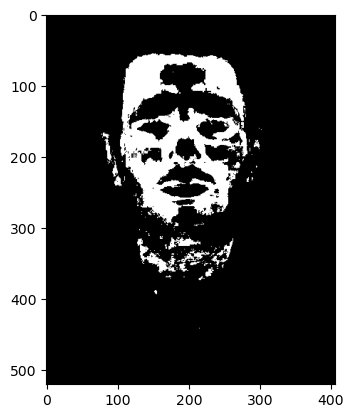

In [31]:
plt.imshow(mask7, cmap='gray')

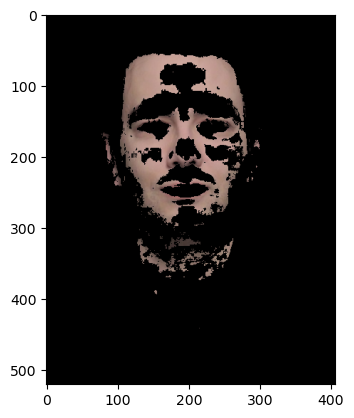

In [32]:
final = cv2.bitwise_and(img, img, mask = mask7)
plt.imshow(final[...,::-1])

In [33]:
final_res = cv2.bitwise_and(res_int8,mask7)

In [34]:
pic = cv2.bitwise_and(img, img, mask = final_res)

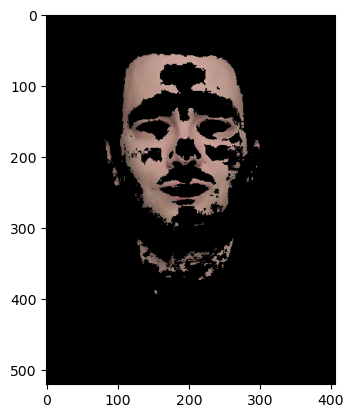

In [35]:
plt.imshow(pic[...,::-1])